In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,4)

In [ ]:
def plot_series(s,title):
  s.plot()
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag='AIC')
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys, [res[0], res[1], res[2], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat,
          "pvalue": pval,
          "lags": lags,
          "crit_values": crit,
          "regression": regression }


def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistics: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

def rolling_mean_var(s, window=24, title="Rolling Mean and Var"):
    rolling_mean = s.rolling(window).mean()
    rolling_var = s.rolling(window).var()
    fig, ax = plt.subplots(2, 1, figsize=(10,6))
    ax[0].plot(s, label="Original")
    ax[0].plot(rolling_mean, label="Rolling Mean")
    ax[0].legend()
    ax[0].set_title(title + "- mean")
    ax[1].plot(rolling_var, label="Rolling Var")
    ax[1].legend()
    ax[1].set_title(title + "- var")
    plt.show()



In [ ]:
n = 240 # months
t = np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0, 1, n))

# Non-Stationary
trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0, 1, n))


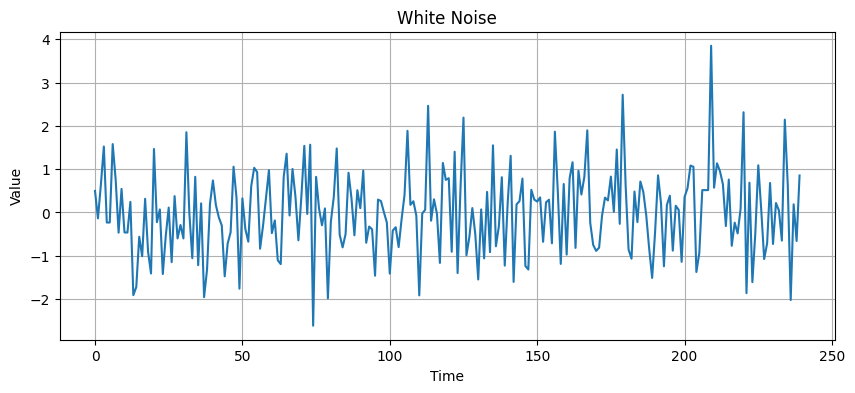

Test White Noise
ADF Statistics: -16.112 p=5.006520467194035e-29
KPSS: stat=0.298 p=0.1


/tmp/ipython-input-2334633596.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


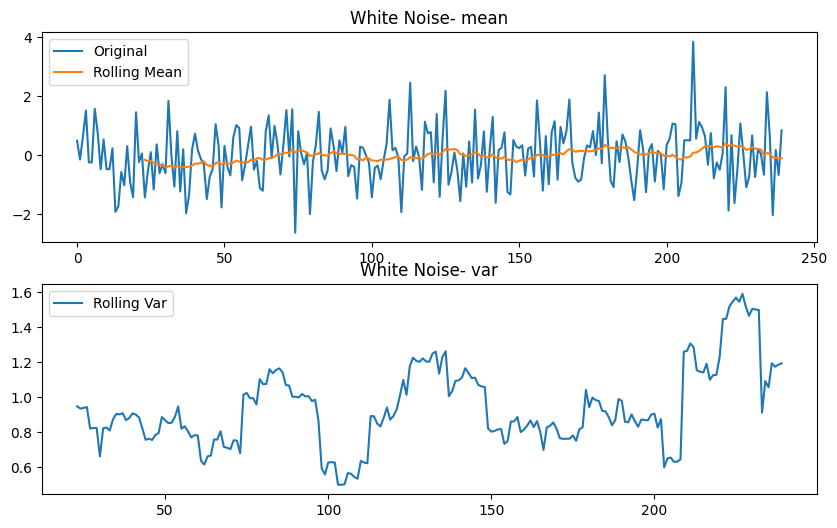

In [ ]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

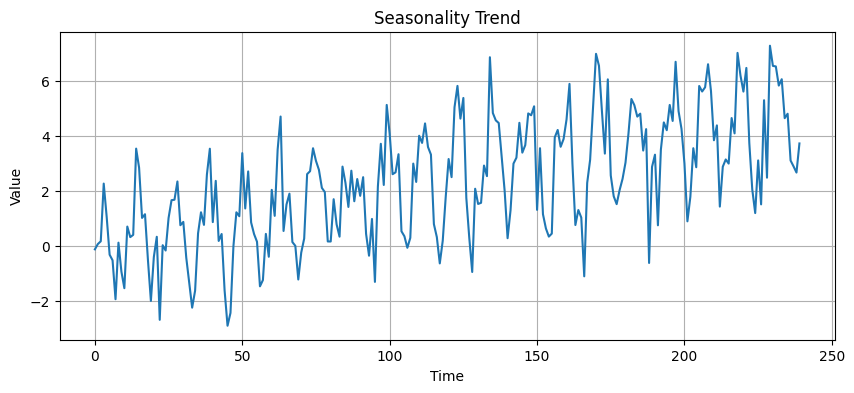

Test Seasonality Trend
ADF Statistics: -0.530 p=0.8860859361543622
KPSS: stat=2.407 p=0.01


/tmp/ipython-input-2334633596.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


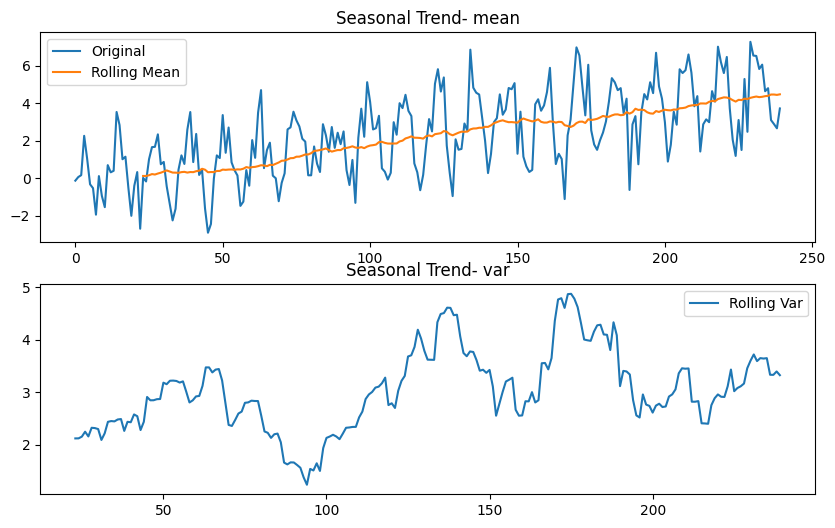

In [ ]:
# Seasona + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend = 0.02 * t
season_trend = pd.Series(trend + seasonal + np.random.normal(0, 1, n))
plot_series(season_trend, "Seasonality Trend")
print_test(season_trend, "Seasonality Trend")
rolling_mean_var(season_trend, window=24, title='Seasonal Trend')